<a href="https://colab.research.google.com/github/TadieB/pytorch-collab/blob/main/logisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

# Download and Visualize Datasets

In [2]:
# download training dataset
dataset = MNIST(root='data/',download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 231796475.55it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 12517897.47it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 76493069.47it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4572858.56it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

label: 3


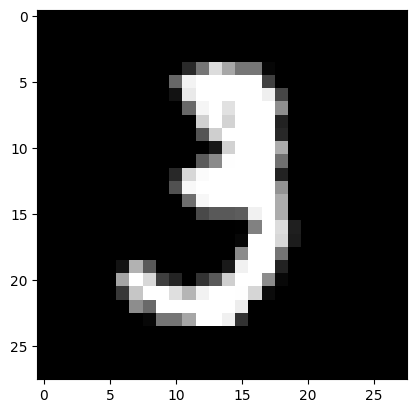

In [8]:
image,label = dataset[10]

plt.imshow(image,cmap='gray')
print('label:',label)

In [9]:
# pytorch doesn't know how to work with images. so convert them to tensors

import torchvision.transforms as transforms

In [10]:
# MNIST dataset (image and labels)
dataset = MNIST(root = 'data/',
                train = True,
                transform= transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [13]:
# img_tensor

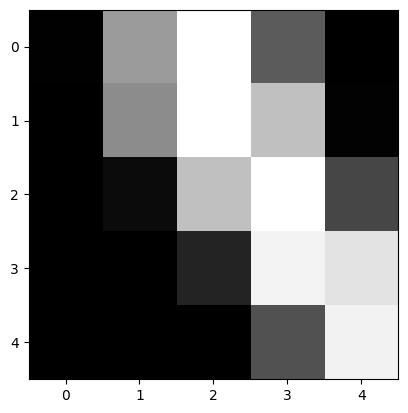

In [14]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

# Split Datasets Training and Validation

In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset,[50000, 10000])
len(train_ds),len(val_ds)


(50000, 10000)

In [16]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
# logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)

torch.Size([10, 784])


In [19]:
model.weight

Parameter containing:
tensor([[-0.0267,  0.0286, -0.0272,  ..., -0.0299, -0.0040, -0.0022],
        [-0.0068, -0.0321, -0.0031,  ..., -0.0217, -0.0313, -0.0351],
        [ 0.0326,  0.0249,  0.0030,  ...,  0.0150, -0.0108,  0.0193],
        ...,
        [ 0.0117, -0.0148, -0.0037,  ..., -0.0075,  0.0064, -0.0144],
        [-0.0012,  0.0061,  0.0178,  ...,  0.0028, -0.0026, -0.0120],
        [-0.0303, -0.0084, -0.0252,  ...,  0.0236, -0.0347, -0.0283]],
       requires_grad=True)

In [20]:
model.bias

Parameter containing:
tensor([-0.0202, -0.0295, -0.0210, -0.0018, -0.0273,  0.0063, -0.0211, -0.0272,
        -0.0064,  0.0022], requires_grad=True)

In [21]:
print(model.bias.shape)

torch.Size([10])


In [38]:
# for images, labels in train_loader:
#   print(labels)
#   print(images.shape)
#   outputs = model(images)
#   break

In [27]:
# To remove the above error, .reshape method of
# a tensor will allow us to efficiently
# view each image as a flat vector
# without really changing the underlying data.

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()

# the model nolonger has .weight, .bias attributes , they are inside the
#  . linear attribute, but it does have .parameters method which returns a list
# containing the weights and bias and can be used by a pyTorch optimize.

In [28]:
print(model.linear.weight.shape, model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [29]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0217,  0.0277,  0.0031,  ...,  0.0244,  0.0007,  0.0137],
         [-0.0198, -0.0097,  0.0312,  ...,  0.0264, -0.0066,  0.0174],
         [ 0.0009, -0.0212, -0.0227,  ..., -0.0333,  0.0047, -0.0281],
         ...,
         [ 0.0198,  0.0065,  0.0142,  ...,  0.0285,  0.0161, -0.0308],
         [-0.0279, -0.0098,  0.0350,  ...,  0.0188,  0.0079,  0.0109],
         [ 0.0304,  0.0352,  0.0348,  ...,  0.0283, -0.0176, -0.0327]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0072, -0.0343,  0.0193,  0.0037,  0.0144, -0.0203,  0.0322, -0.0336,
          0.0195, -0.0104], requires_grad=True)]

In [31]:
for images, labels in train_loader:
  print('images.shape:', images.shape)
  outputs = model(images)
  break

print('outputs.shape:', outputs.shape)
print('sample outputs:\n',outputs[:2].data)

images.shape: torch.Size([128, 1, 28, 28])
outputs.shape: torch.Size([128, 10])
sample outputs:
 tensor([[ 0.1207, -0.2088, -0.0750,  0.0344, -0.1098,  0.0910, -0.2157, -0.1409,
          0.0830, -0.3348],
        [-0.0683, -0.1112,  0.1769,  0.1722,  0.1142,  0.0346, -0.0674, -0.1094,
          0.1442, -0.3633]])


In [32]:
outputs[0]

tensor([ 0.1207, -0.2088, -0.0750,  0.0344, -0.1098,  0.0910, -0.2157, -0.1409,
         0.0830, -0.3348], grad_fn=<SelectBackward0>)

In [34]:
exps = torch.exp(outputs[0])
exps

tensor([1.1283, 0.8116, 0.9277, 1.0350, 0.8960, 1.0953, 0.8059, 0.8686, 1.0865,
        0.7155], grad_fn=<ExpBackward0>)

# SoftMax

In [36]:
# changing each output between 0 to 1, add up to 1.

probs = exps/torch.sum(exps)
probs

tensor([0.1204, 0.0866, 0.0990, 0.1105, 0.0956, 0.1169, 0.0860, 0.0927, 0.1159,
        0.0764], grad_fn=<DivBackward0>)

In [37]:
torch.sum(probs)

tensor(1., grad_fn=<SumBackward0>)

In [39]:
import torch.nn.functional as F

#apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#look at sample probabilities
print('Sample probabilities:\n', probs[:2].data)

#add up the probabilities of an output row
print('sum:', torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1204, 0.0866, 0.0990, 0.1105, 0.0956, 0.1169, 0.0860, 0.0927, 0.1159,
         0.0764],
        [0.0930, 0.0890, 0.1188, 0.1182, 0.1116, 0.1030, 0.0930, 0.0892, 0.1150,
         0.0692]])
sum: 1.0000001192092896


In [42]:
# Determine the predicted label for each image by simply choosing
# the index of the element with the highest prob in each output row.

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

#Printed above are the predicted labels for the first batch of training images.

tensor([0, 2, 2, 3, 3, 4, 6, 2, 8, 8, 3, 3, 5, 5, 5, 3, 5, 5, 4, 5, 5, 0, 2, 3,
        3, 3, 3, 3, 5, 2, 7, 3, 3, 2, 2, 3, 2, 3, 7, 4, 3, 3, 0, 5, 5, 2, 5, 3,
        8, 3, 3, 0, 3, 5, 2, 5, 3, 2, 3, 2, 4, 2, 5, 0, 3, 5, 3, 7, 0, 8, 2, 3,
        2, 5, 6, 3, 2, 3, 2, 3, 4, 8, 3, 7, 5, 5, 0, 5, 7, 5, 5, 7, 3, 5, 2, 7,
        2, 3, 3, 0, 3, 2, 3, 5, 3, 3, 5, 3, 0, 3, 2, 3, 5, 5, 3, 4, 5, 0, 2, 3,
        2, 3, 3, 2, 2, 3, 2, 3])
tensor([0.1204, 0.1188, 0.1360, 0.1139, 0.1316, 0.1225, 0.1174, 0.1240, 0.1318,
        0.1305, 0.1334, 0.1280, 0.1152, 0.1399, 0.1212, 0.1210, 0.1384, 0.1284,
        0.1451, 0.1151, 0.1288, 0.1207, 0.1443, 0.1334, 0.1227, 0.1605, 0.1687,
        0.1382, 0.1249, 0.1389, 0.1282, 0.1364, 0.1254, 0.1672, 0.1241, 0.1251,
        0.1138, 0.1292, 0.1181, 0.1314, 0.1249, 0.1219, 0.1208, 0.1361, 0.1412,
        0.1228, 0.1381, 0.1363, 0.1224, 0.1555, 0.1198, 0.1261, 0.1394, 0.1236,
        0.1449, 0.1363, 0.1332, 0.1315, 0.1299, 0.1226, 0.1212, 0.1238, 0.1317,
       

# Evaluation Metric and Loss Function